In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("./Blood Transfusion Service Center.csv")
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [17]:
df.shape[0]

750

In [18]:
y = ['donated']
X = ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)','Time (months)']

In [19]:
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'donated'],
      dtype='object')

In [22]:
train_X, test_X, train_Y, test_Y = train_test_split(df[X],df[y])

In [28]:
tf.reset_default_graph()
X = tf.placeholder(dtype=tf.float32, name= "X")
y = tf.placeholder(dtype=tf.float32, name= "y")
W1 = tf.Variable(tf.truncated_normal((4,16),stddev=0.1))
B1 = tf.Variable(tf.zeros([16]))
W2 = tf.Variable(tf.truncated_normal((16,2),stddev=0.1))
B2 = tf.Variable(tf.zeros([2]))
A1 = tf.sigmoid(tf.matmul(X, W1)+B1)
A2 = tf.matmul(A1, W2)+B2

loss = tf.reduce_mean(tf.losses.softmax_cross_entropy(y,A2))
correct_prediction = tf.equal(tf.argmax(A2,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,dtype=tf.float32))
#Defning loss minimisation
optimizer = tf.train.AdamOptimizer()
opt = optimizer.minimize(loss)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
l = []
ls = []
acc_train = []
acc_test = []
#Run the iterations
for i in range(100):
    sess.run(opt, feed_dict = {X: train_X, y:pd.get_dummies(train_Y)})
    acc_test.append(sess.run(accuracy, feed_dict={X: test_X, y:pd.get_dummies(test_Y)}))
    acc_train.append(sess.run(accuracy, feed_dict = {X: train_X, y:pd.get_dummies(train_Y)}))
    ls.append(sess.run(loss, feed_dict={X: test_X, y:pd.get_dummies(test_Y)}))
    l.append(sess.run(loss, feed_dict={X: train_X, y:pd.get_dummies(train_Y)}))
    weights1 = sess.run(W1)
    weights2 = sess.run(W2)

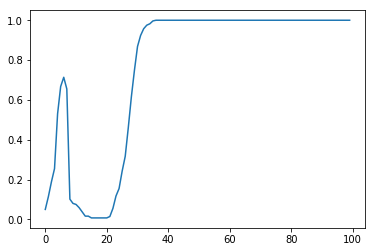

In [33]:
# Train Accuracy
plt.plot(range(100), acc_train)

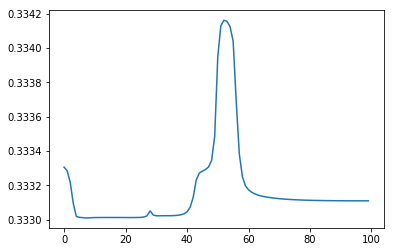

In [31]:
# Train Loss
plt.plot(range(100), l)

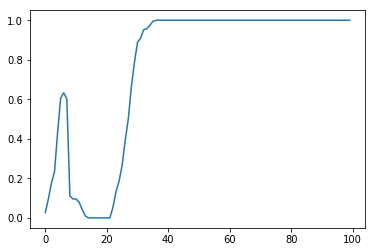

In [32]:
# Test Accuracy
plt.plot(range(100), acc_test)

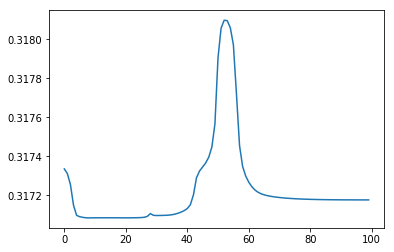

In [30]:
# Test Loss
plt.plot(range(100), ls)